There are two types of KNN imputer:

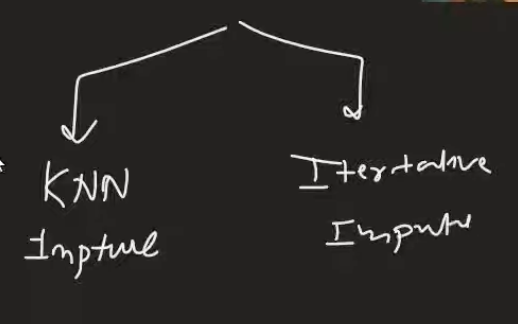